# Student Performance Indicator

## Life cycle of ML project

- understanding the problem statement
- data cleaning
- data checks
- EDA
- data preprocessing
- model training
- model selection

## 1) Problem Statement

To understand how student's performance (test scores) is affected by other variables such as gender, ethinicity, parental level of education, lunch and test preparation course.

## 2) Data Collection
- Data downloaded from - [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- data dimensions - 1000 rows and 8 columns

## 2.1 Importing data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## 2.2 Dataset information

Categorical columns

- gender (M/F) 
- race/ethinicity (group A,B,C,D,E) 
- parent's education (bachelors, masters, associates, high school, some high school, some college) 
- lunch (standard, free/reduced) 
- test prep course (none, completed)

Numerical features

- math score
- writing
- reading


# 3. Data checks

* check missing values
* check duplicates
* check data type
* check the number of unique values and categories in each column
* data summary statistics


## 3.1 Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No missing values

## 3.2 Duplicates

In [6]:
df.duplicated().sum()

0

#### No duplicates

## 3.3 Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Data summary statistics

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.5 Checking number of unique values

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
categorical_cols = ['gender','race/ethnicity','parental level of education',
'lunch', 'test preparation course']
df[categorical_cols].nunique(), [df[col].unique().tolist() for col in categorical_cols]

(gender                         2
 race/ethnicity                 5
 parental level of education    6
 lunch                          2
 test preparation course        2
 dtype: int64,
 [['female', 'male'],
  ['group B', 'group C', 'group A', 'group D', 'group E'],
  ["bachelor's degree",
   'some college',
   "master's degree",
   "associate's degree",
   'high school',
   'some high school'],
  ['standard', 'free/reduced'],
  ['none', 'completed']])

Numerical and categorical features

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## 3.6 Feature Engineering

Adding columns Total score and average

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Insights from exam scores

In [19]:
for col in numerical_features:
    full_stats = df[df[col]==100]['average'].count()
    print("Number of students with full " + col +  ": ", full_stats)

Number of students with full math score:  7
Number of students with full reading score:  17
Number of students with full writing score:  14


In [20]:
for col in numerical_features:
    lessthan20_stats = df[df[col]<=20]['average'].count()
    print("Number of students with less than 20 in " + col +  ": ", lessthan20_stats)

Number of students with less than 20 in math score:  4
Number of students with less than 20 in reading score:  1
Number of students with less than 20 in writing score:  3


Students performed best in reading section and worst in math section

# 4. Exploring with Data Visualization 

### 4.1 Average score distribution

<Axes: xlabel='average', ylabel='Count'>

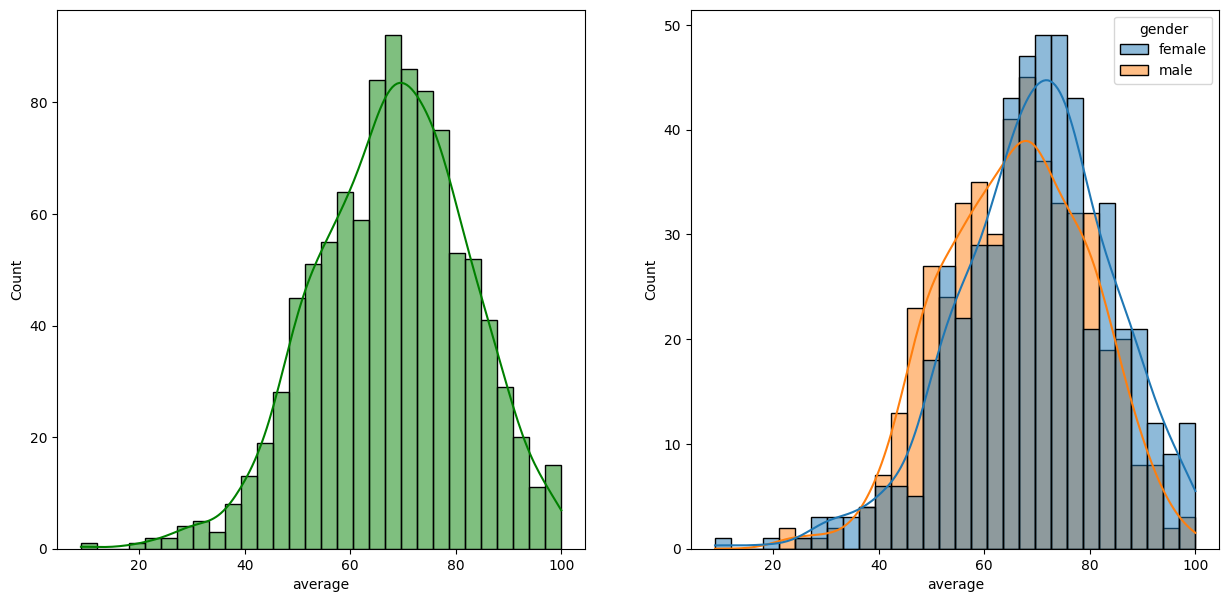

In [21]:
fig,axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(df, x='average',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(df, x='average',bins=30, kde=True, hue='gender')

Female students tends to perform better than male students

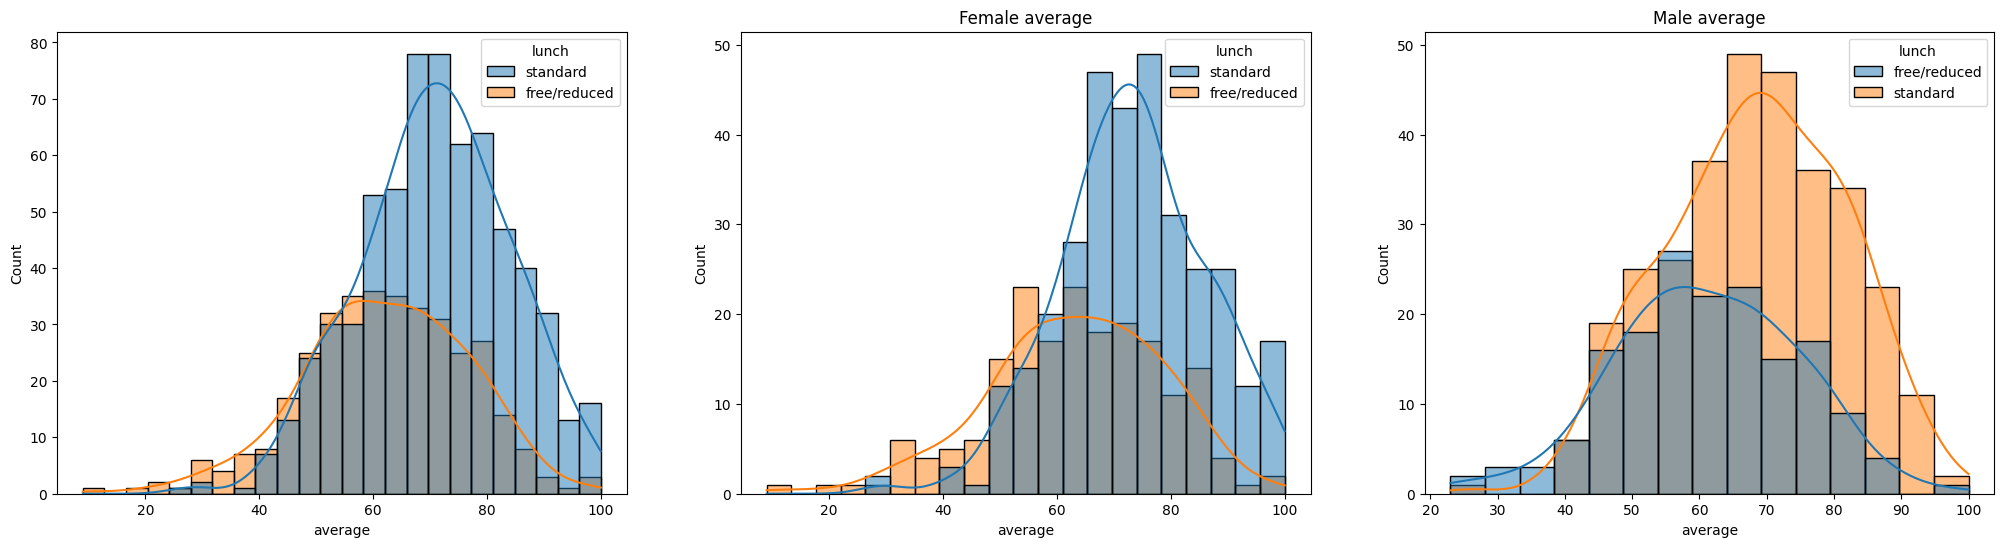

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x='average',kde=True, hue='lunch')
plt.subplot(132)
plt.title("Female average")
sns.histplot(df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
plt.title("Male average")
sns.histplot(df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

Those students with standard lunch option perform better

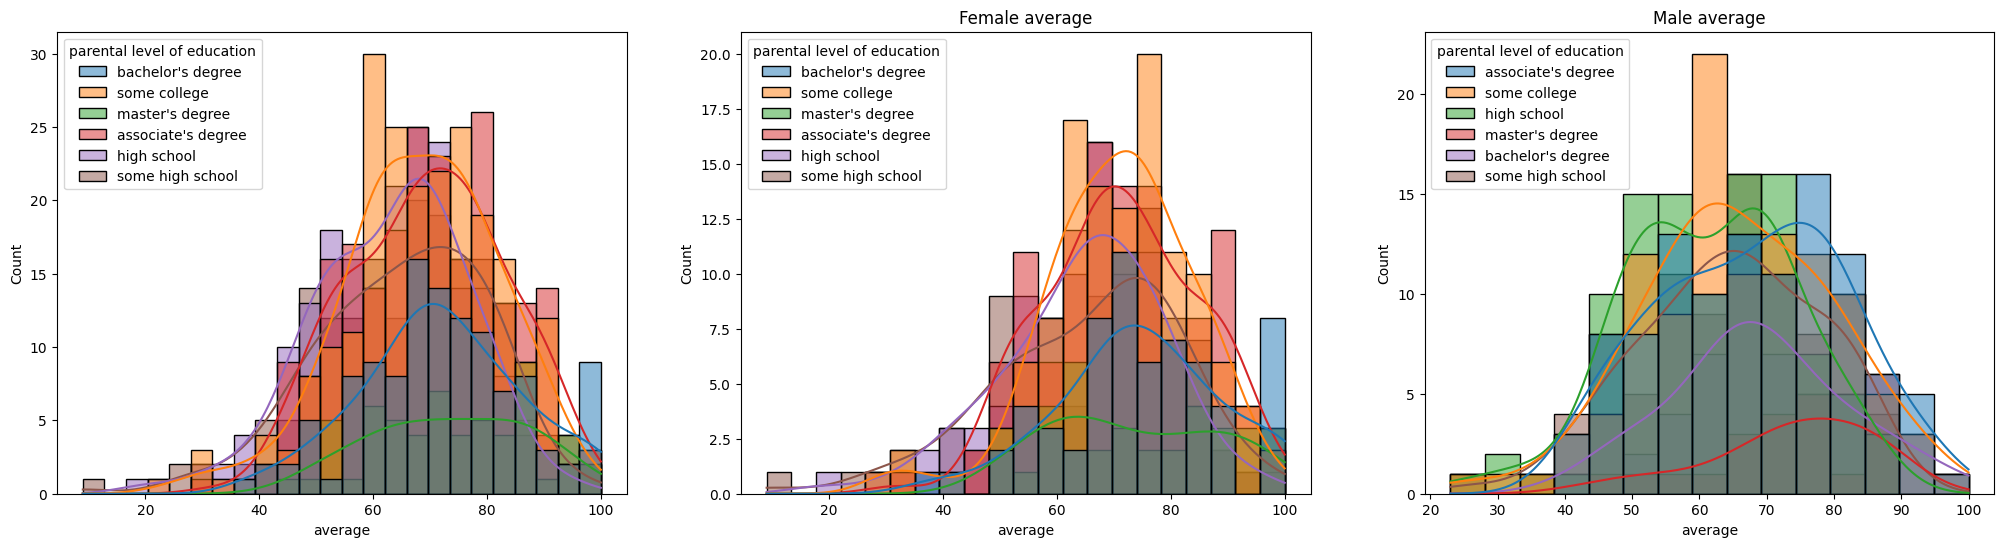

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x='average',kde=True, hue='parental level of education')
plt.subplot(132)
plt.title("Female average")
sns.histplot(df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
plt.title("Male average")
sns.histplot(df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.show()

Parent's level of education does not really affect students' performance significantly.

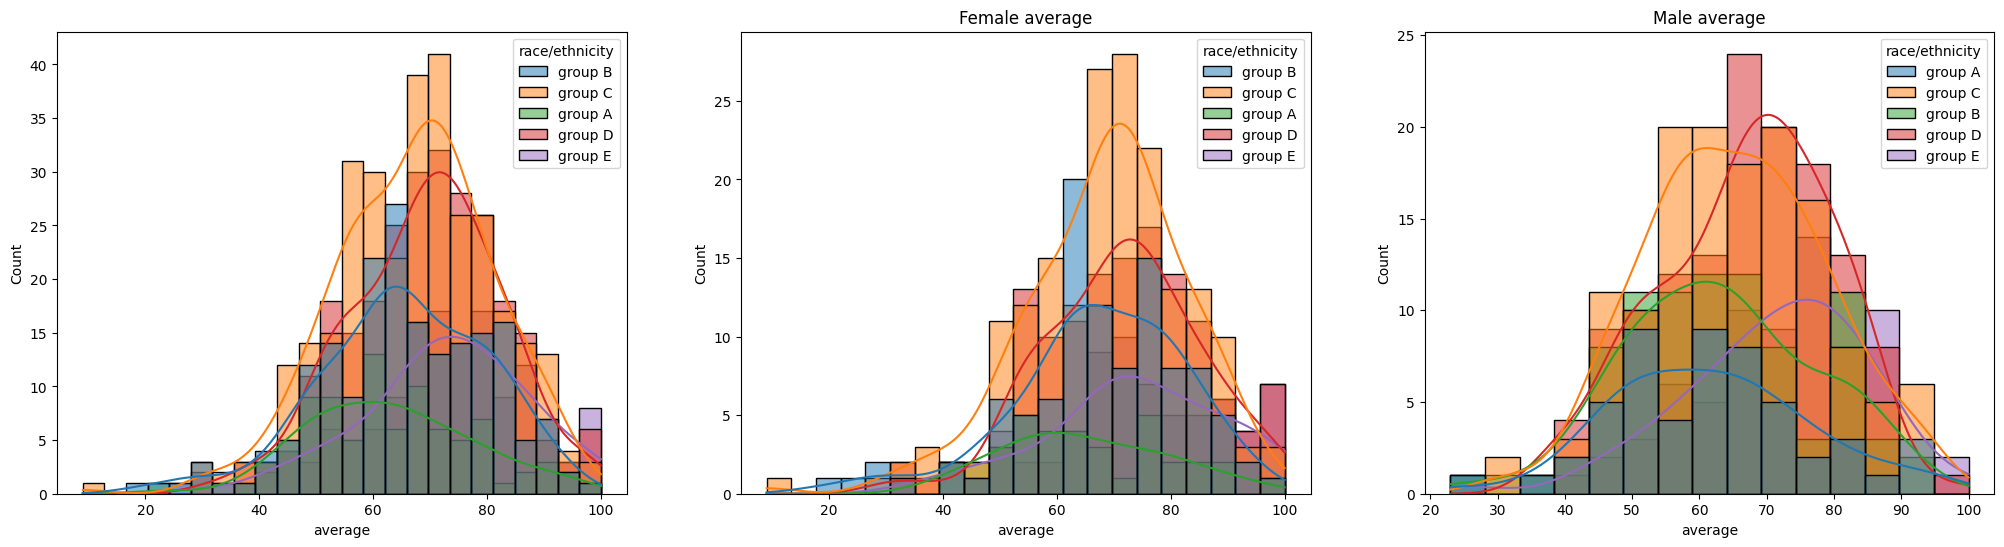

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(df, x='average',kde=True, hue='race/ethnicity')
plt.subplot(132)
plt.title("Female average")
sns.histplot(df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(133)
plt.title("Male average")
sns.histplot(df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

group A and group B students tends to perform poorly in exams

### 4.2 Subject score distribution

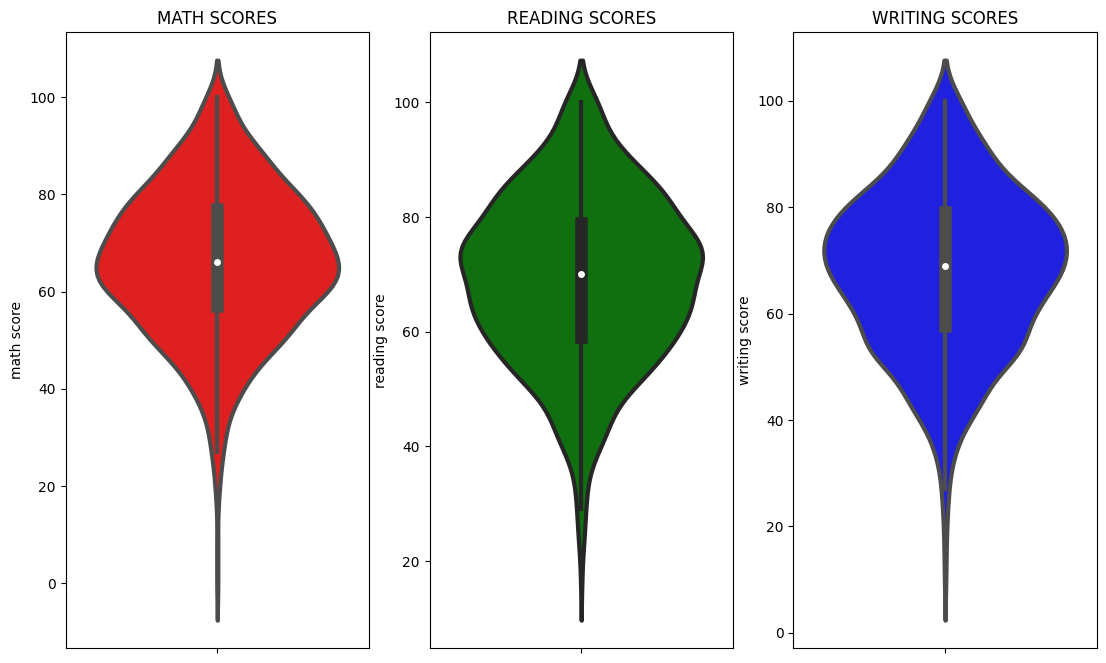

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Most students score between 55 and 80 in all three sections

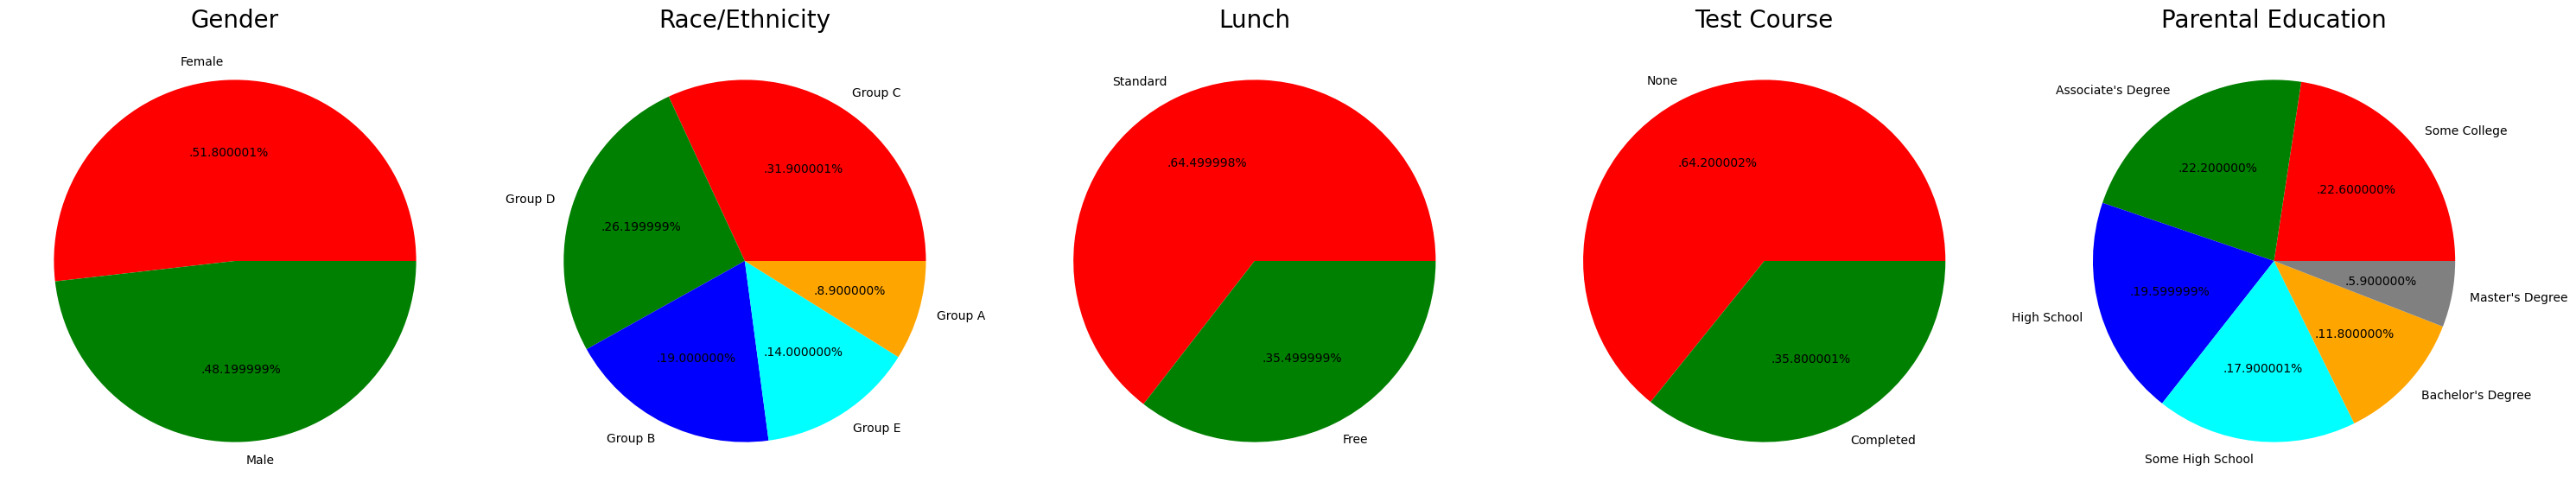

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

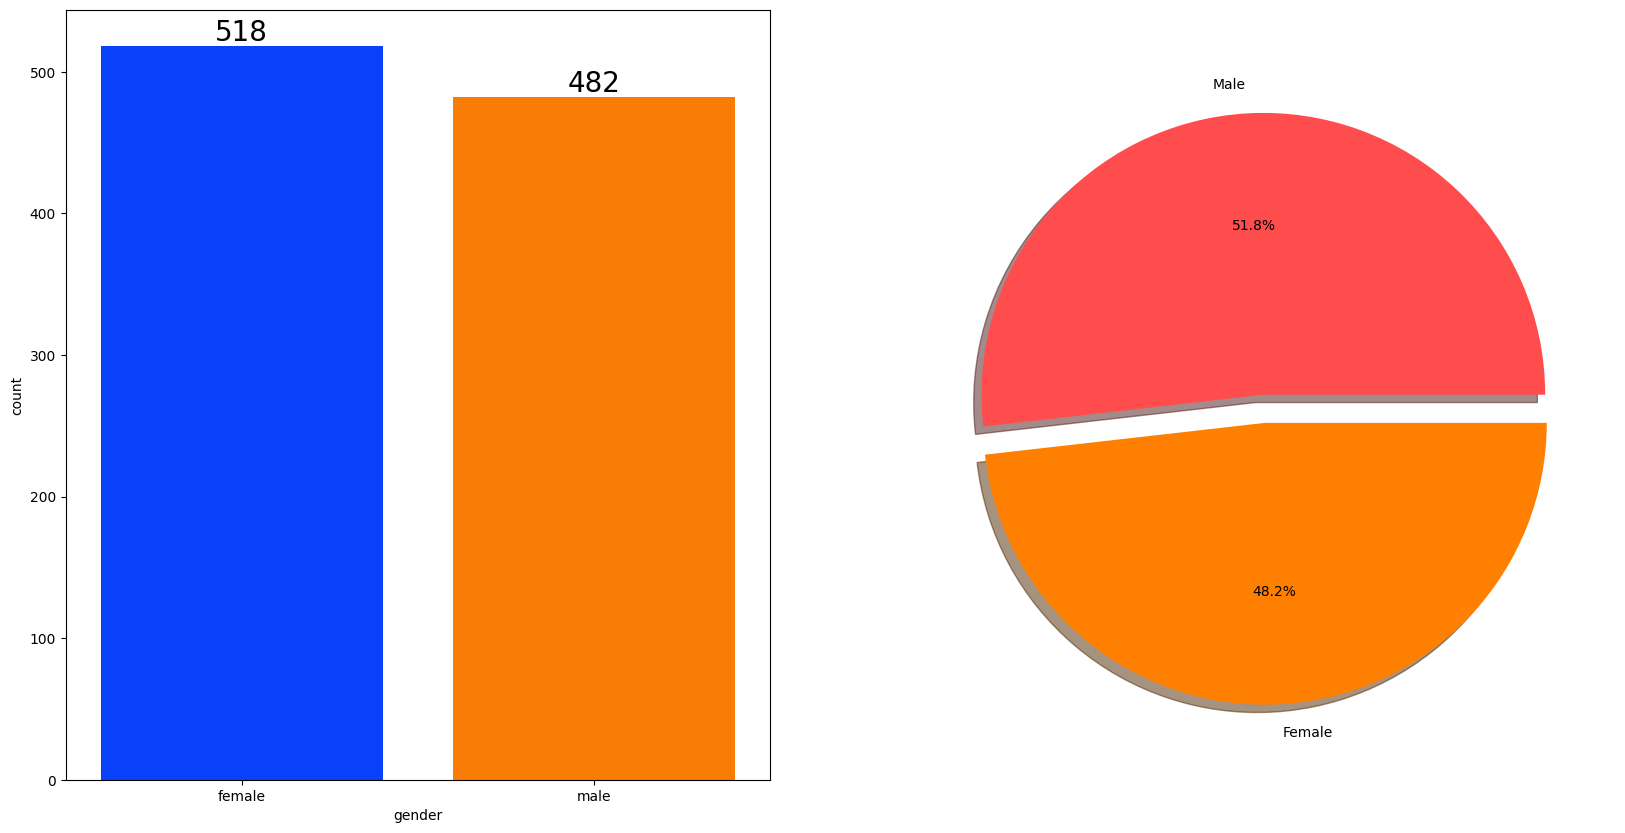

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

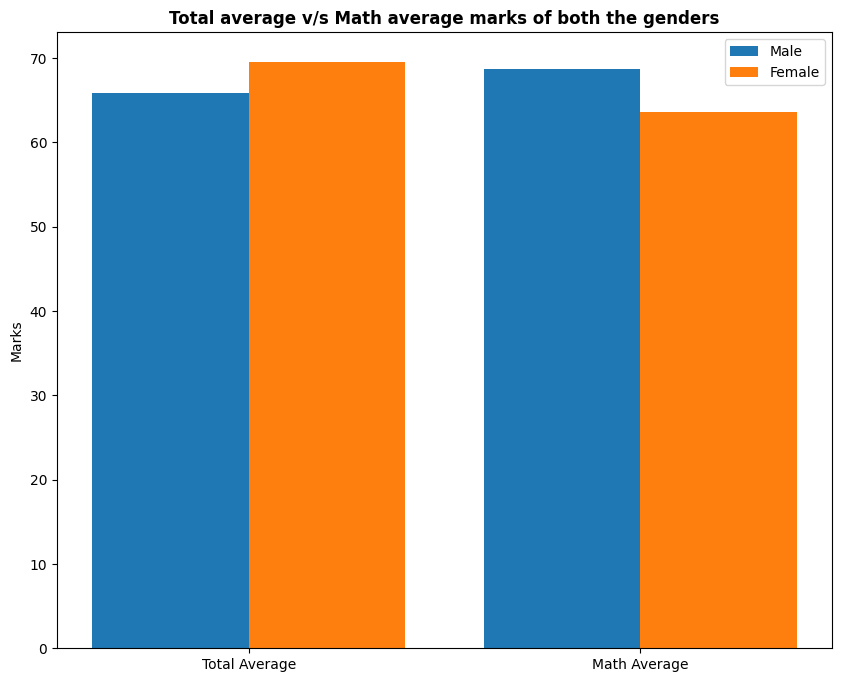

In [41]:
gender_group = df.groupby('gender')[['average','math score']].mean()
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()